In [3]:
import pandas as pd # to load and manipulate data and for One—Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix #'to draw a confusion matrix

In [4]:
df = pd.read_csv('Thursday-WorkingHours-Morning-W.csv',header=0)

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,5992350,3,1,12,0,6,0,4.0,3.464102,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,50897,1,1,59,145,59,59,59.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,80,5351955,3,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack Brute Force
3,53,70420,2,2,96,612,48,48,48.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49750,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# checking the Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             10008 non-null  int64  
 1    Flow Duration                10008 non-null  int64  
 2    Total Fwd Packets            10008 non-null  int64  
 3    Total Backward Packets       10008 non-null  int64  
 4   Total Length of Fwd Packets   10008 non-null  int64  
 5    Total Length of Bwd Packets  10008 non-null  int64  
 6    Fwd Packet Length Max        10008 non-null  int64  
 7    Fwd Packet Length Min        10008 non-null  int64  
 8    Fwd Packet Length Mean       10008 non-null  float64
 9    Fwd Packet Length Std        10008 non-null  float64
 10  Bwd Packet Length Max         10008 non-null  int64  
 11   Bwd Packet Length Min        10008 non-null  int64  
 12   Bwd Packet Length Mean       10008 non-null  float64
 13   

# Checking unique values in Label column

In [7]:
df['Label'].unique()

array(['BENIGN', 'Web Attack Brute Force', 'Web Attack XSS',
       'Web Attack Sql Injection'], dtype=object)

# Format Data: X and y

# Dropping the row if we have NaN or Infinity values

In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

# Spliting the Feature and Initializing the Target

In [9]:
X=df.drop('Label',axis=1).copy()
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,5992350,3,1,12,0,6,0,4.0,3.464102,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0
1,53,50897,1,1,59,145,59,59,59.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
2,80,5351955,3,1,0,0,0,0,0.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
3,53,70420,2,2,96,612,48,48,48.0,0.000000,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
4,49750,1,2,0,12,0,6,6,6.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [10]:
y=df['Label'].copy()
y=y.replace(["Web Attack Brute Force", "Web Attack XSS",
       "Web Attack Sql Injection"],"Web Attack")

In [11]:
y.unique()

array(['BENIGN', 'Web Attack'], dtype=object)

# Building Classification Model

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

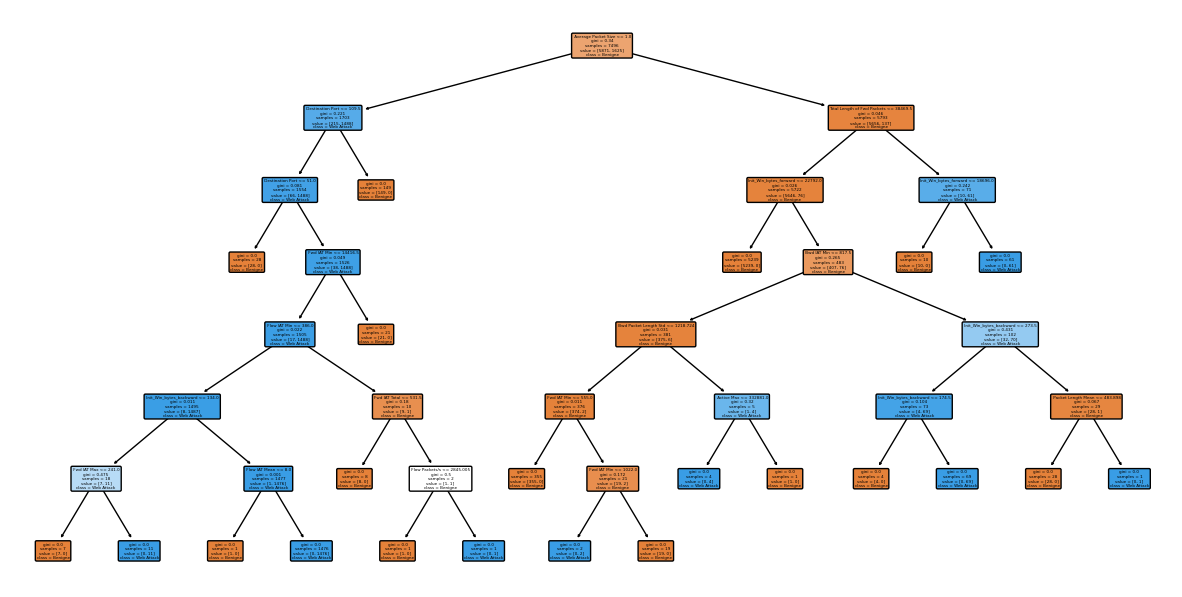

In [13]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True,
          rounded=True,
         class_names=["Benigne","Web Attack"],
         feature_names=X.columns);

# Plotting Confusion Matrix

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


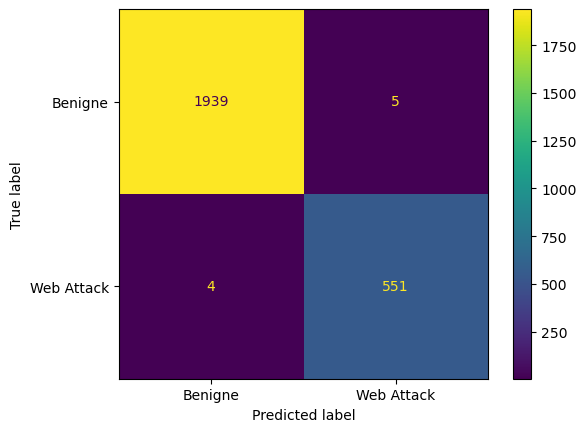

In [14]:
plot_confusion_matrix(clf_dt, X_test,y_test, display_labels=["Benigne","Web Attack"])

# cost_complexity_pruning_path for calculation the Alpha

In [15]:
path=clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

clf_dts=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

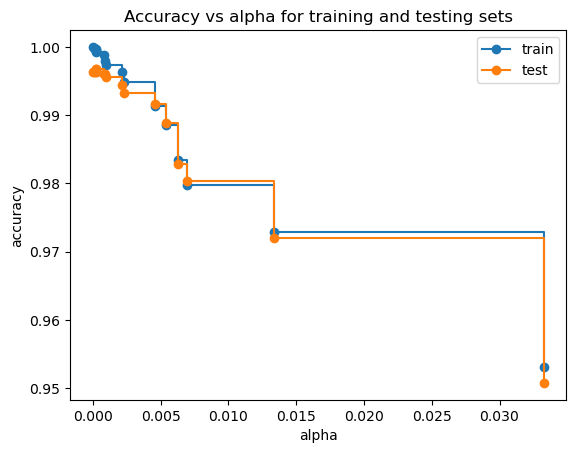

In [16]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores =[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label="train",drawstyle= "steps-post")
ax.plot(ccp_alphas, test_scores, marker='o',label="test",drawstyle= "steps-post")
ax.legend()
plt.show()

# Cross Valiadiation for finding the Best Alpha

<AxesSubplot:xlabel='tree'>

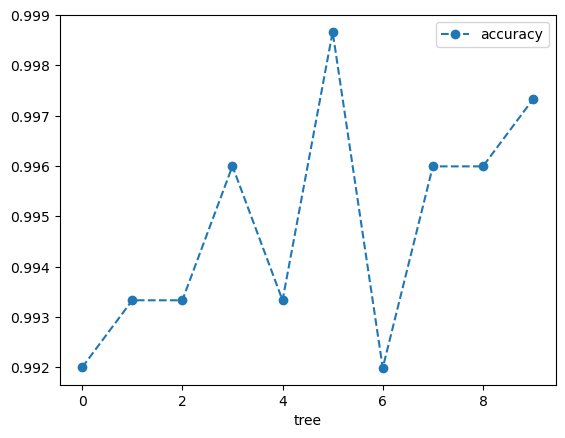

In [17]:
clf_dt=DecisionTreeClassifier(random_state=42, ccp_alpha=0.002)
scores = cross_val_score(clf_dt,X_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(10),'accuracy':scores})
df.plot(x='tree',y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

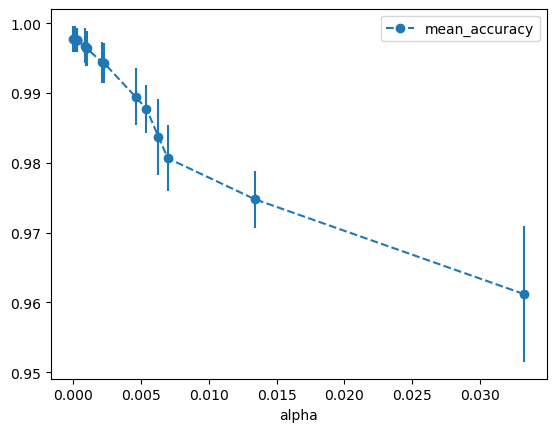

In [18]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results =pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',
                 y='mean_accuracy',
                 yerr='std',
                 marker='o',
                 linestyle='--')

In [19]:
alpha_results[(alpha_results['alpha'] >0.001) & (alpha_results['alpha']<0.0019)]

,alpha,mean_accuracy,std
8,0.001009,0.996398,0.002534


In [20]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] >0.001) & (alpha_results['alpha']<0.0019)]['alpha']
ideal_ccp_alpha

8    0.001009
Name: alpha, dtype: float64

In [21]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.0010087571819125452

# Building the Decision Tree based on Ideal Alpha

In [22]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                      ccp_alpha=ideal_ccp_alpha)
clf_det_pruned = clf_dt_pruned.fit(X_train,y_train)

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


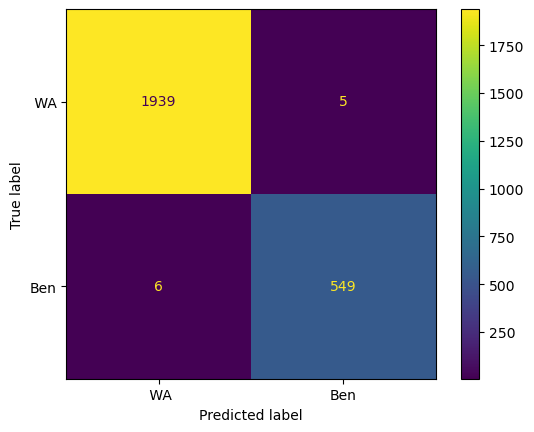

In [23]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test, display_labels=[" WA","Ben"])

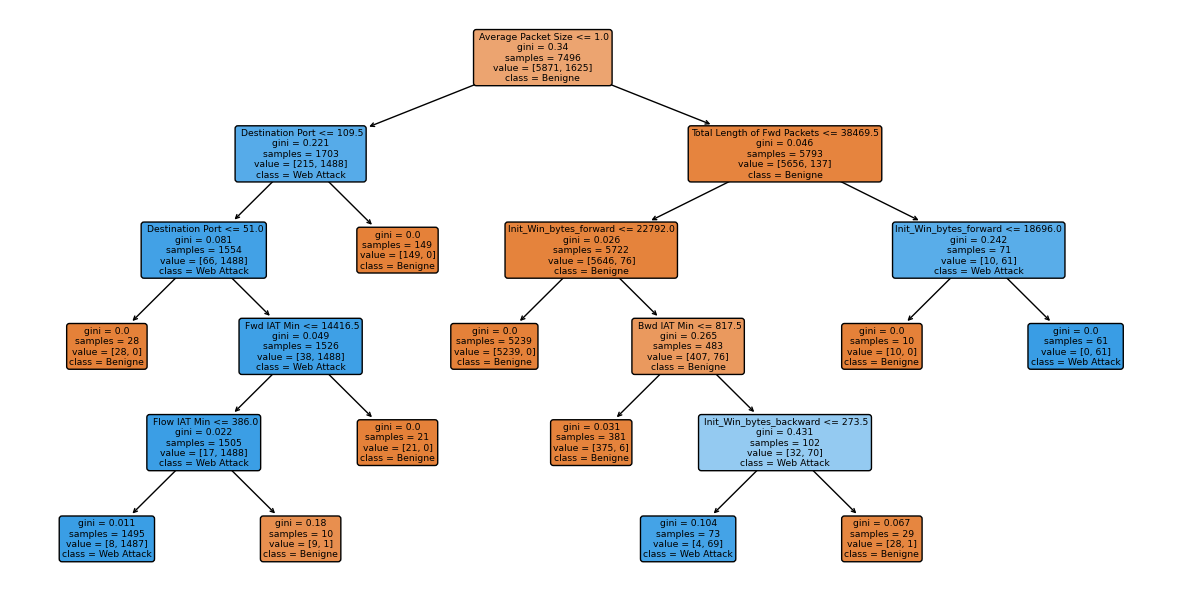

In [24]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True,
          rounded=True,
         class_names=["Benigne","Web Attack"],
         feature_names=X.columns);

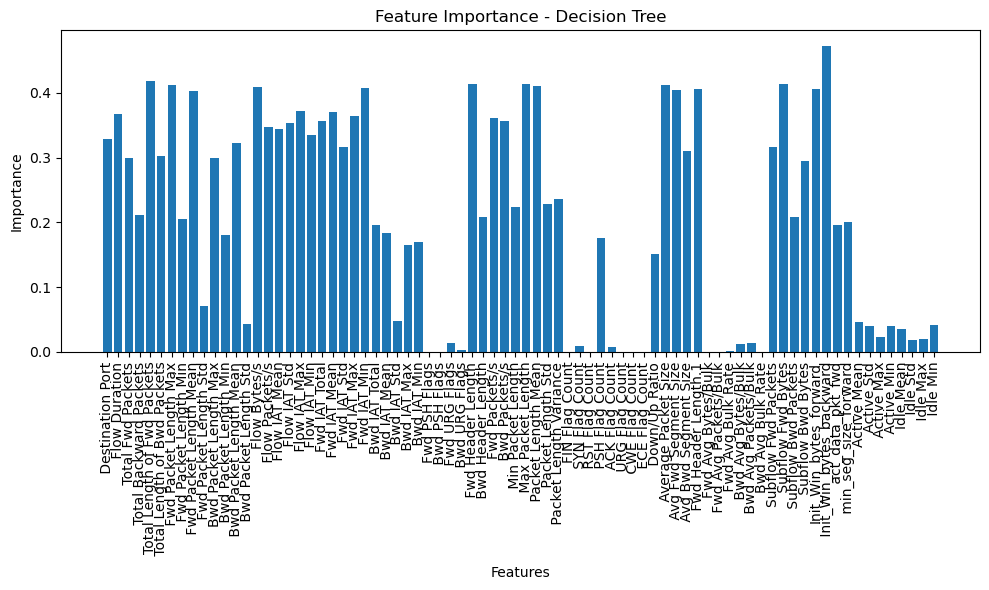

NameError: name 'precision_score' is not defined

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

def ml_model(X_train, X_test, Y_train, Y_test, ideal_alpha):
    # Perform feature selection
    best_features = SelectKBest(score_func=mutual_info_classif, k=10)
    X_train_selected = best_features.fit_transform(X_train, Y_train)
    X_test_selected = best_features.transform(X_test)
    
    # Get the feature names and scores
    feature_names = X_train.columns
    feature_scores = best_features.scores_
    
    # Plot the feature scores
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), feature_scores)
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance - Decision Tree')
    plt.tight_layout()
    plt.show()
    
    # Train the model
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_alpha)
    clf_dt.fit(X_train_selected, Y_train)
    
    # Predict on the test set
    pred = clf_dt.predict(X_test_selected)
    
    # Evaluate the model
    MLA_name = 'DecisionTreeClassifier with Feature Selection'
    MLA_compare = pd.DataFrame(columns=['Model Name', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 score'])
    MLA_compare.loc[0, 'Model Name'] = MLA_name
    MLA_compare.loc[0, 'Train Accuracy'] = round(clf_dt.score(X_train_selected, Y_train), 2)
    MLA_compare.loc[0, 'Test Accuracy'] = round(clf_dt.score(X_test_selected, Y_test), 2)
    MLA_compare.loc[0, 'Precision'] = round(precision_score(Y_test, pred), 2)
    MLA_compare.loc[0, 'Recall'] = round(recall_score(Y_test, pred), 2)
    MLA_compare.loc[0, 'F1 score'] = round(f1_score(Y_test, pred), 2)
    
    return MLA_compare

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Perform feature selection and evaluate the model
ideal_alpha = ideal_ccp_alpha  # Replace with your ideal alpha value
Feature_selection = ml_model(X_train[:1000], X_test[:200], Y_train[:1000], Y_test[:200], ideal_alpha)
print(Feature_selection)

# Decision Tree Alogrithm Result

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

def ml_model(X_train, X_test, Y_train, Y_test):
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.002)
    predicted = clf_dt.fit(X_train, Y_train).predict(X_test)
    MLA_name = 'DecisionTreeClassifier'
    MLA_compare = pd.DataFrame(columns=['Model Name', 'Train Accuracy', 'Test Accuracy', 'Precision (BENIGN)', 'Precision (Web Attack)', 'Recall (BENIGN)', 'Recall (Web Attack)', 'F1 score (BENIGN)', 'F1 score (Web Attack)'])
    MLA_compare.loc[0, 'Model Name'] = MLA_name
    MLA_compare.loc[0, 'Train Accuracy'] = round(clf_dt.score(X_train, Y_train), 2)
    MLA_compare.loc[0, 'Test Accuracy'] = round(clf_dt.score(X_test, Y_test), 2)
    
    # Calculate precision, recall, and F1 score for each class
    MLA_compare.loc[0, 'Precision (BENIGN)'] = round(precision_score(Y_test, predicted, pos_label='BENIGN'), 2)
    MLA_compare.loc[0, 'Precision (Web Attack)'] = round(precision_score(Y_test, predicted, pos_label='Web Attack'), 2)
    
    MLA_compare.loc[0, 'Recall (BENIGN)'] = round(recall_score(Y_test, predicted, pos_label='BENIGN'), 2)
    MLA_compare.loc[0, 'Recall (Web Attack)'] = round(recall_score(Y_test, predicted, pos_label='Web Attack'), 2)
    
    MLA_compare.loc[0, 'F1 score (BENIGN)'] = round(f1_score(Y_test, predicted, pos_label='BENIGN'), 2)
    MLA_compare.loc[0, 'F1 score (Web Attack)'] = round(f1_score(Y_test, predicted, pos_label='Web Attack'), 2)
    
    return MLA_compare

ml_model(X_train[:1000], X_test[:200], Y_train[:1000], Y_test[:200])


,Model Name,Train Accuracy,Test Accuracy,Precision (BENIGN),Precision (Web Attack),Recall (BENIGN),Recall (Web Attack),F1 score (BENIGN),F1 score (Web Attack)
0,DecisionTreeClassifier,1.0,0.99,1.0,0.95,0.99,1.0,0.99,0.97


In [28]:
from sklearn.metrics import classification_report
clf_dt .fit(X_train[:1000],Y_train[:1000])
pred = clf_dt.predict(X_test[:200])
print("Accuracy",accuracy_score(Y_test[:200],pred))
print(classification_report(Y_test[:200],pred))

Accuracy 0.96
              precision    recall  f1-score   support

      BENIGN       0.98      0.97      0.98       164
  Web Attack       0.87      0.92      0.89        36

    accuracy                           0.96       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.96      0.96      0.96       200



C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


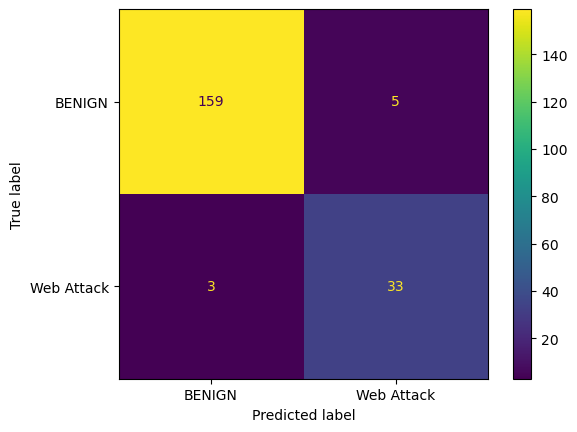

In [29]:
confusion_matrix(Y_test[:200],pred)
plot_confusion_matrix(clf_dt, X_test[:200], Y_test[:200])


# Vector Machine Model

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report



# Define the SVM model
svm_model = SVC()

# Perform k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, X_train[:1000], Y_train[:1000], cv=kfold)

# Calculate the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

# Create a new SVM model with the optimal C value
best_C = 1.0  # Replace with the optimal C value obtained from grid search or your desired value
svm_model_best = SVC(C=best_C)

# Fit the model to the entire training set
svm_model_best.fit(X_train, Y_train)

# Predict the labels for the test set
pred = svm_model_best.predict(X_test[:200])

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test[:200], pred)
print("Accuracy:", accuracy)

# Print the classification report
report = classification_report(Y_test[:200], pred)
print("Classification Report:\n", report)


Mean Accuracy: 0.9390000000000001
Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.99      0.95      0.97       164
  Web Attack       0.81      0.97      0.89        36

    accuracy                           0.95       200
   macro avg       0.90      0.96      0.93       200
weighted avg       0.96      0.95      0.96       200



In [31]:
svm_model = SVC()
svm_model.fit(X_train[:1000], Y_train[:1000])
pred = svm_model.predict(X_test[:200])

print("Accuracy:", accuracy_score(Y_test[:200], pred))
print(classification_report(Y_test[:200], pred))

Accuracy: 0.955
              precision    recall  f1-score   support

      BENIGN       0.99      0.95      0.97       164
  Web Attack       0.81      0.97      0.89        36

    accuracy                           0.95       200
   macro avg       0.90      0.96      0.93       200
weighted avg       0.96      0.95      0.96       200



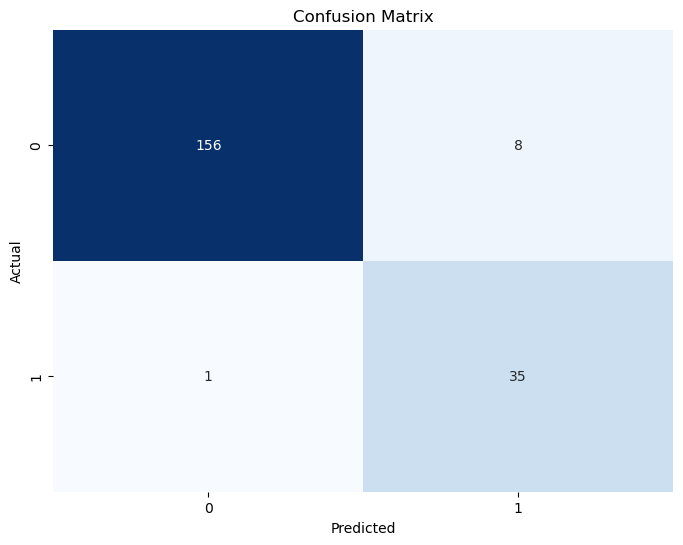

In [32]:
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(Y_test[:200], pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural_Network

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def neural_model(X_train, X_test, Y_train, Y_test):
    neural = MLPClassifier(random_state=1, max_iter=300)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(neural, X_train[:1000], Y_train[:1000], cv=kfold)
    
    MLA_name = 'MLPClassifier'
    MLA_compare = pd.DataFrame(columns=['Model Name', 'Train Accuracy', 'Test Accuracy', 'Precision (BENIGN)', 'Precision (Web Attack)', 'Recall (BENIGN)', 'Recall (Web Attack)', 'F1 score (BENIGN)', 'F1 score (Web Attack)'])
    
    # Calculate the mean accuracy
    mean_accuracy = scores.mean()
    
    # Create a new MLPClassifier model with the optimal parameters
    neural_best = MLPClassifier(random_state=1, max_iter=300)
    
    # Fit the model to the entire training set
    neural_best.fit(X_train[:1000], Y_train[:1000])
    
    # Predict the labels for the test set
    predicted = neural_best.predict(X_test[:200])
    
    MLA_compare.loc[0, 'Model Name'] = MLA_name
    MLA_compare.loc[0, 'Train Accuracy'] = round(mean_accuracy, 2)
    MLA_compare.loc[0, 'Test Accuracy'] = round(accuracy_score(Y_test[:200], predicted), 2)
    
    # Calculate precision, recall, and F1 score for each class
    MLA_compare.loc[0, 'Precision (BENIGN)'] = round(precision_score(Y_test[:200], predicted, pos_label='BENIGN'), 2)
    MLA_compare.loc[0, 'Precision (Web Attack)'] = round(precision_score(Y_test[:200], predicted, pos_label='Web Attack'), 2)
    
    MLA_compare.loc[0, 'Recall (BENIGN)'] = round(recall_score(Y_test[:200], predicted, pos_label='BENIGN'), 2)
    MLA_compare.loc[0, 'Recall (Web Attack)'] = round(recall_score(Y_test[:200], predicted, pos_label='Web Attack'), 2)
    
    MLA_compare.loc[0, 'F1 score (BENIGN)'] = round(f1_score(Y_test[:200], predicted, pos_label='BENIGN'), 2)
    MLA_compare.loc[0, 'F1 score (Web Attack)'] = round(f1_score(Y_test[:200], predicted, pos_label='Web Attack'), 2)
    
    return MLA_compare

neural_model(X_train[:1000], X_test[:200], Y_train[:1000], Y_test[:200])


,Model Name,Train Accuracy,Test Accuracy,Precision (BENIGN),Precision (Web Attack),Recall (BENIGN),Recall (Web Attack),F1 score (BENIGN),F1 score (Web Attack)
0,MLPClassifier,0.95,0.94,0.98,0.79,0.95,0.92,0.96,0.85


In [34]:
neural = MLPClassifier(random_state=1, max_iter=300)
neural.fit(X_train[:1000], Y_train[:1000])
pred = neural.predict(X_test[:200])

print("Accuracy",accuracy_score(Y_test[:200],pred))
print(classification_report(Y_test[:200], pred))

Accuracy 0.94
              precision    recall  f1-score   support

      BENIGN       0.98      0.95      0.96       164
  Web Attack       0.79      0.92      0.85        36

    accuracy                           0.94       200
   macro avg       0.88      0.93      0.90       200
weighted avg       0.95      0.94      0.94       200



C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


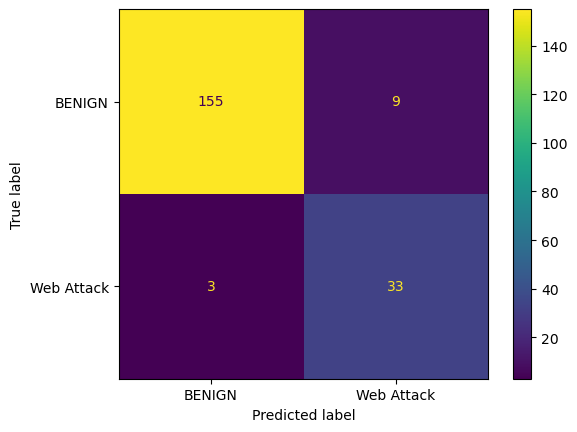

In [50]:
plot_confusion_matrix(neural, X_test[:200], Y_test[:200])
plt.show()

# Overall Classification Report for All models

In [45]:
# from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def ml_model(X_train, X_test, Y_train, Y_test):
    MLA = [SVC(), MLPClassifier(random_state=1, max_iter=300), DecisionTreeClassifier(random_state=42, ccp_alpha=0.002)]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns=MLA_columns)
    row_index = 0
    pos_labels = ['BENIGN', 'Web Attack']  # Specify the positive labels
    
    for alg in MLA:
        predicted = alg.fit(X_train, Y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
        
        for label in pos_labels:
            MLA_compare.loc[row_index, f'Precision ({label})'] = round(precision_score(Y_test, predicted, pos_label=label), 2)
            MLA_compare.loc[row_index, f'Recall ({label})'] = round(recall_score(Y_test, predicted, pos_label=label), 2)
            MLA_compare.loc[row_index, f'F1 score ({label})'] = round(f1_score(Y_test, predicted, pos_label=label), 2)
        
        row_index += 1
    
    MLA_compare.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
    return MLA_compare

ml_model(X_train[:1000], X_test[:200], Y_train[:1000], Y_test[:200])


,Model Name,Train Accuracy,Test Accuracy,Precision (BENIGN),Recall (BENIGN),F1 score (BENIGN),Precision (Web Attack),Recall (Web Attack),F1 score (Web Attack)
2,DecisionTreeClassifier,1.00,0.99,1.00,0.99,0.99,0.95,1.00,0.97
0,SVC,0.94,0.96,0.99,0.95,0.97,0.81,0.97,0.89
1,MLPClassifier,0.96,0.94,0.98,0.95,0.96,0.79,0.92,0.85
